# Cramér-Lundberg model simulation using Poisson processes

In this notebook, we will try to make easy-to-replicate simulations of the Cramér-Lundberg model, using a Poisson process to simulate random claims. 

The `get_claims_poisson()` function's goal is no track the company's wealth, taking into account:
- the initial fortune, represented by `u`,
- `n`, the number of days we are simulating,
- `premium`, the monthly cost that the customer pays to the company,
- `lamb`, corresponding to $\lambda$ which is the parameter of the Poisson process,
- `claims_max_cost`, the highest cost that the insurance company pays to the customer in the event of a claims.
This function returns the tracking of the general fortune, as well as the tracking of the number of claims, and the corresponding time axis.

`plot_growth()` is a function that plots the growth of the fortune of the company. Note that the fortune is done using `plt.plot()`, whereas the counting of the number of claims is done using `plt.step()`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cramer_lundberg import *

<Figure size 921.6x691.2 with 0 Axes>

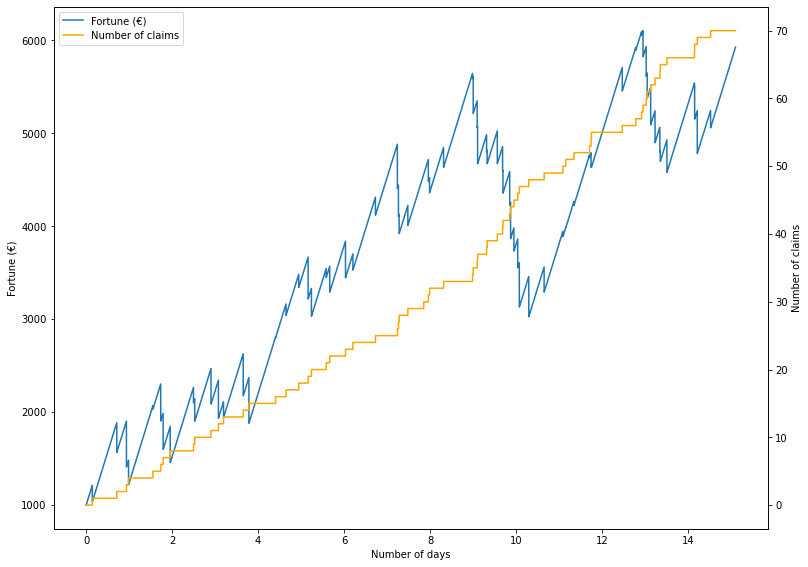

In [2]:
u = 1000
n = 15
premium = 1500
lamb = 5
claims_max_cost = 500

(R,S,t,Y,rho,mu,ytn) = get_claims_poisson(u, n, premium,lamb, claims_max_cost)

#THE CLAIM FOLLOWS A UNIFORM DISTRIBUTION ON [0,claims_max_cost]
# PLEASE CHANGE THIS IF THE MODEL OF THE CLAIM CHANGES

plot_growth(R, S, t, Y)

μ = 253.16774806509667, λ = 5, c = 1500


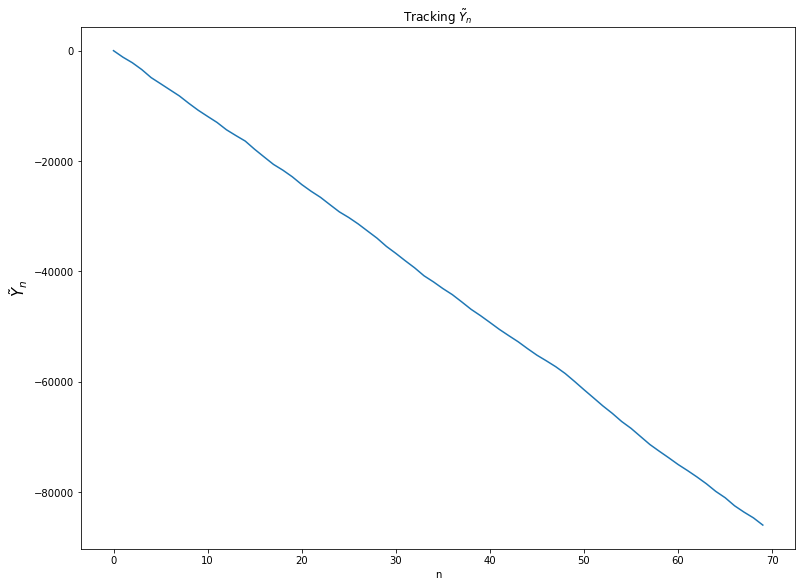

ρ = λμ/c = 0.8438924935503221
The survival probability equals 1. Good!


In [3]:
plot_y_tilde_n(ytn,rho, mu, lamb,premium, plot=True)

The variables can be modified, depending of the insurance company and the frequencies of the claims. If these events happen very frequently, then the premium could be increased to maintain a positive growth.

<ipython-input-4-4aa77a40ac6f>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.step(t,S/t, label = r'$\frac{N_t}{t}$')


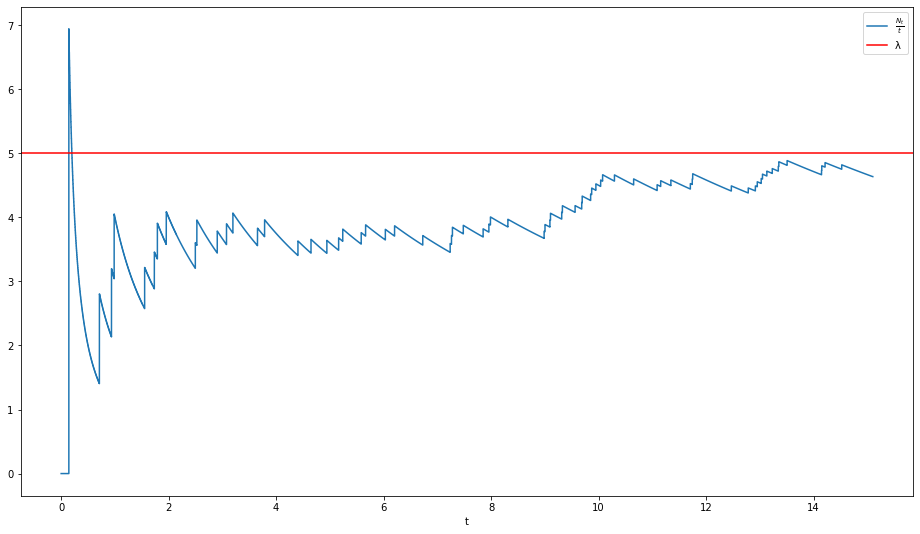

In [4]:
plt.figure(figsize=(16,9))
plt.step(t,S/t, label = r'$\frac{N_t}{t}$')
plt.axhline(lamb,color='r', label = "\u03BB")
# plt.title(r'Limit of $\frac{N_t}{t}$')
plt.xlabel("t")
plt.legend()
plt.show()